# K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure 
KNN is a non-parametric, lazy learning algorithm. It classifies new cases based on a similarity measure (e.g., distance functions). It is mostly used for classification problems.

## KNN Classifiers

KNN classifer is used for classifying objects based on closest training examples in the feature space. It is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until function evaluation.

In [1]:
#import libraries
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load the data
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#split the data into X and y
X = data.drop('species', axis=1)
y = data['species']

In [9]:
#load the model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

In [10]:
#fit the model to the data
model.fit(X, y)

KNeighborsClassifier()

In [ ]:
#predict the model on new data
new_data = np.array([[3.1, 3.9, 4.4, 0.5]])
model.predict(new_data)

**using Train Test Split**

In [14]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

#load the model
knn = KNeighborsClassifier(n_neighbors=5)

#fit the model to the training data
model.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
#predict the model on the test data
y_pred = model.predict(X_test)

#evaluate the model
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



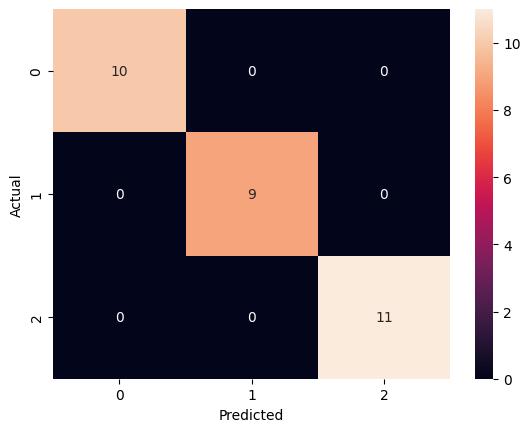

In [16]:
#plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## KNN Regressor

KNN Regressor is used for predicting continuous values.

In [17]:
#load the data
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
#import libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [18]:
#split the data into X and y
X = data.drop('tip', axis=1)
y = data['tip']

In [25]:
#label encode the categorical and object columns using for loop
label = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label.fit_transform(X[col])


In [30]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

#load the model
knn_reg = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)

In [31]:
#train the model
knn_reg.fit(X_train, y_train)

#predict the model
y_pred = knn_reg.predict(X_test)

In [32]:
#evaluate the model
print("mean_squared_error", mean_squared_error(y_test, y_pred))
print("r2_score", r2_score(y_test, y_pred))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred)))

mean_squared_error 0.8382265306122448
r2_score 0.3294034029001649
root_mean_squared_error 0.9155471209130881
